In [ ]:
# !pip install mpl_finance
# !pip install yfinance

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import sklearn
from sklearn.preprocessing import StandardScaler
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import yfinance as yf

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import torch.nn.functional as F

import matplotlib.pyplot as plt

/home/eytan/miniconda/envs/data-science/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

# from google.colab import drive
# drive.mount('/content/drive')

device(type='cpu')

## We'll train on AAPL

In [3]:
apple = yf.Ticker('SPY')
apple_data = apple.history(start="2012-01-01", end="2020-12-14", auto_adjust=True, actions=False)
apple_data

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,107.353399,107.874371,107.076107,107.134926,193697900
2012-01-04,106.882842,107.395409,106.471109,107.302979,127186500
2012-01-05,106.723187,107.748315,106.235826,107.588661,173895000
2012-01-06,107.723103,107.739912,106.958457,107.311371,148050000
2012-01-09,107.555067,107.706311,107.059309,107.571877,99530200
...,...,...,...,...,...
2020-12-07,369.019989,369.619995,367.720001,369.089996,48944300
2020-12-08,367.720001,370.779999,367.670013,370.170013,42458900
2020-12-09,370.880005,371.049988,365.950012,366.850006,74098300


In [4]:
apple_data.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11'],
              dtype='datetime64[ns]', name='Date', length=2252, freq=None)

In [5]:
apple_data['num_date'] = dates.date2num(apple_data.index)
apple_data

,Open,High,Low,Close,Volume,num_date
Date,,,,,,
2012-01-03,107.353399,107.874371,107.076107,107.134926,193697900,15342.0
2012-01-04,106.882842,107.395409,106.471109,107.302979,127186500,15343.0
2012-01-05,106.723187,107.748315,106.235826,107.588661,173895000,15344.0
2012-01-06,107.723103,107.739912,106.958457,107.311371,148050000,15345.0
2012-01-09,107.555067,107.706311,107.059309,107.571877,99530200,15348.0
...,...,...,...,...,...,...
2020-12-07,369.019989,369.619995,367.720001,369.089996,48944300,18603.0
2020-12-08,367.720001,370.779999,367.670013,370.170013,42458900,18604.0
2020-12-09,370.880005,371.049988,365.950012,366.850006,74098300,18605.0


In [6]:
# Create a list of lists where each inner-list represents
# one day's trading history
apple = apple_data[['num_date', 'Open', 'High', 'Low', 'Close', 'Volume']]
apple_list = apple.values.tolist()

Plot a candlestick chart for Apples stock

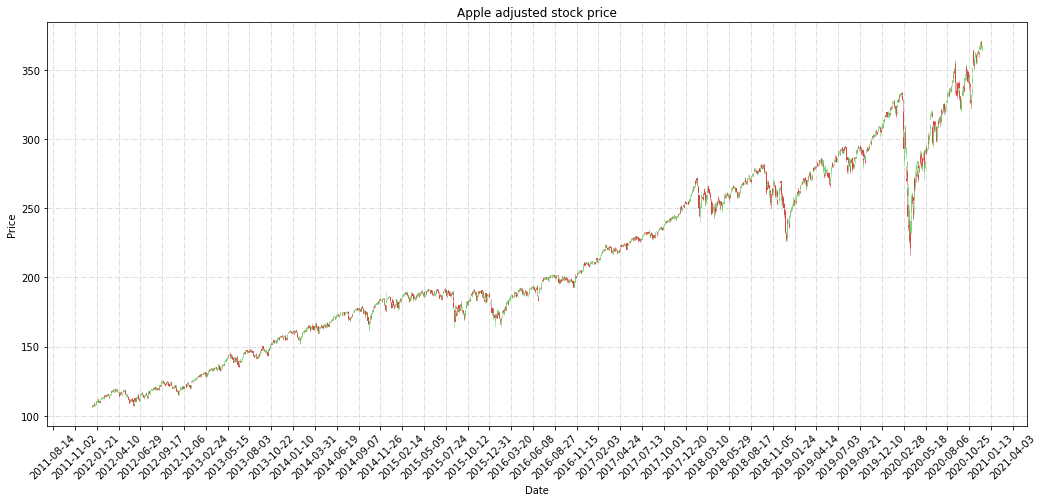

In [7]:

# Build the plot
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot2grid((1,1), (0,0))

candlestick_ohlc(ax1, apple_list, width=0.4, colorup='#77d879', colordown='#db3f3f',)

for label in ax1.xaxis.get_ticklabels():
     label.set_rotation(45)

ax1.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(50))
ax1.grid(True, alpha=0.5, linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple adjusted stock price')
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

# Scaling the data

In [8]:
apple = apple[['Open', 'High', 'Low', 'Close', 'Volume']]
apple

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,107.353399,107.874371,107.076107,107.134926,193697900
2012-01-04,106.882842,107.395409,106.471109,107.302979,127186500
2012-01-05,106.723187,107.748315,106.235826,107.588661,173895000
2012-01-06,107.723103,107.739912,106.958457,107.311371,148050000
2012-01-09,107.555067,107.706311,107.059309,107.571877,99530200
...,...,...,...,...,...
2020-12-07,369.019989,369.619995,367.720001,369.089996,48944300
2020-12-08,367.720001,370.779999,367.670013,370.170013,42458900
2020-12-09,370.880005,371.049988,365.950012,366.850006,74098300


In [9]:
data = apple.values
data[:3]

array([[1.07353399e+02, 1.07874371e+02, 1.07076107e+02, 1.07134926e+02,
        1.93697900e+08],
       [1.06882842e+02, 1.07395409e+02, 1.06471109e+02, 1.07302979e+02,
        1.27186500e+08],
       [1.06723187e+02, 1.07748315e+02, 1.06235826e+02, 1.07588661e+02,
        1.73895000e+08]])

#### Split the data into training and testing sets

In [10]:
test_size = 365

train_data = data[:-test_size]
test_data = data[-test_size:]

In [11]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
train_data = torch.FloatTensor(train_data).to(device)
len(train_data), train_data[:3]

(1887,
 tensor([[-1.6844, -1.6845, -1.6796, -1.6903,  1.7562],
         [-1.6939, -1.6940, -1.6918, -1.6869,  0.3963],
         [-1.6970, -1.6870, -1.6965, -1.6812,  1.3513]]))

In [12]:
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)
test_data = torch.FloatTensor(test_data).to(device)
len(test_data), test_data[:3]

(365,
 tensor([[-0.6774, -0.7325, -0.6306, -0.6448, -0.6082],
         [-0.6925, -0.7461, -0.6234, -0.7022, -0.7029],
         [-0.7438, -0.7727, -0.6487, -0.6893, -0.7799]]))

In [13]:
# we split the data into 100 day sequences of open, high, low, close data
# and the target value to be the next days closing price.
def create_sequences(input_data, seq_len):
    seq = []
    L = len(input_data)
    for i in range(L-seq_len):
        train_seq = input_data[i:i+seq_len]
        train_label = input_data[i+seq_len:i+seq_len+1][0,3]
        seq.append((train_seq ,train_label))
    return seq

In [14]:
seq_len = 100
train_seq = create_sequences(train_data, seq_len)
print(f'There are {len(train_seq)} training sequences where each sequence has a shape of {train_seq[0][0].shape}')
print(f'and each sequence is paired with the closing price of the next day.')

There are 1787 training sequences where each sequence has a shape of torch.Size([100, 5])
and each sequence is paired with the closing price of the next day.


In [15]:
test_seq = create_sequences(test_data, seq_len)
print(f'There are {len(test_seq)} testing sequences where each sequence has a shape of {test_seq[0][0].shape}')
print(f'and each sequence is paired with the closing price of the next day.')

There are 265 testing sequences where each sequence has a shape of torch.Size([100, 5])
and each sequence is paired with the closing price of the next day.


In [16]:
from lstm import LSTM_linear_before_after


In [17]:
model = LSTM_linear_before_after(5, 100, 1).to(device)
loss_function = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print(model)

LSTM_linear_before_after(
  (fc2): Linear(in_features=5, out_features=32, bias=True)
  (lstm): LSTM(32, 100)
  (fc1): Linear(in_features=100, out_features=1, bias=True)
)


In [18]:
epochs = 30

loss_history = []
running_loss = []
for i in range(epochs):
    
    for j, (seq, labels) in enumerate(train_seq):
        seq = seq.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        model.h0 = torch.zeros(1, 1, model.hidden_size, device=device)
        model.c0 = torch.zeros(1, 1, model.hidden_size, device=device)

        y_pred = model(seq)
               
        loss = loss_function(y_pred, labels)
        loss.backward()
        optimizer.step()

        running_loss.append(loss.item())

        if j % 50 == 0:
            avg_loss = sum(running_loss) / 50
            print(f'Epoch {i+1:3}, iteration {j:5}, loss: {avg_loss}')
            loss_history.append(avg_loss)
            running_loss = []

/home/eytan/miniconda/envs/data-science/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch   1, iteration     0, loss: 0.05304903507232666
Epoch   1, iteration    50, loss: 0.26494514756763693
Epoch   1, iteration   100, loss: 0.0025108437439484987
Epoch   1, iteration   150, loss: 0.0012453156974379454
Epoch   1, iteration   200, loss: 0.0006766716614257007
Epoch   1, iteration   250, loss: 0.0006902183439706277
Epoch   1, iteration   300, loss: 0.0017695176949862911
Epoch   1, iteration   350, loss: 0.0029376501241324604
Epoch   1, iteration   400, loss: 0.0021912055713619338
Epoch   1, iteration   450, loss: 0.0037506069100345487
Epoch   1, iteration   500, loss: 0.0011557095009337103
Epoch   1, iteration   550, loss: 0.0010917147872675059
Epoch   1, iteration   600, loss: 0.004135308255559949
Epoch   1, iteration   650, loss: 0.0079351566146579
Epoch   1, iteration   700, loss: 0.0036063521530016376
Epoch   1, iteration   750, loss: 0.001380930634781592
Epoch   1, iteration   800, loss: 0.0015087338679059315
Epoch   1, iteration   850, loss: 0.011612813116971665
Ep

KeyboardInterrupt: 

Text(0, 0.5, 'loss')

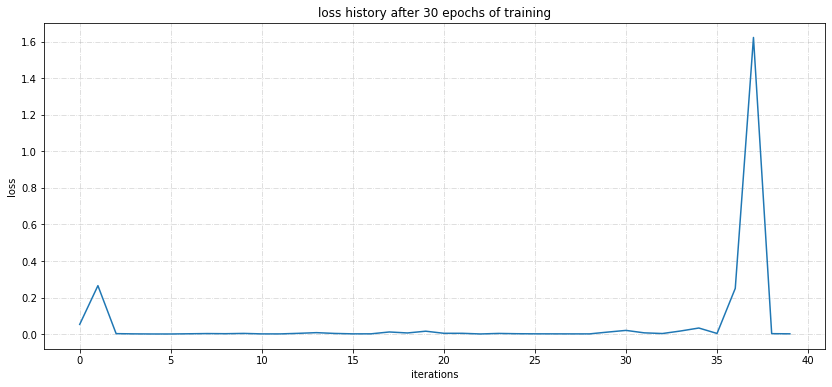

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize=(14,6))

# ax1.xaxis.set_major_locator(mticker.FixedLocator(loc_epochs))
plt.title(f'loss history after 30 epochs of training')
ax1.plot(loss_history)
ax1.grid(alpha=.5, linestyle='-.')
plt.xlabel('iterations')
plt.ylabel('loss')
# plt.savefig('/content/drive/My Drive/Deep Learning Final Project/30_SP500-epoch-loss.jpg')

In [20]:
real_labels = []
predicted_labels = []

with torch.no_grad():
    for i, (seq, label) in enumerate(test_seq):
        seq = seq.to(device)
        label = label.to(device)

        model.h0 = torch.zeros(1, 1, model.hidden_size, device=device) 
        model.c0 = torch.zeros(1, 1, model.hidden_size, device=device)

        real_labels.append(label)
        predicted_labels.append(model(seq))
    

In [21]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(real_labels, predicted_labels)

1.629014

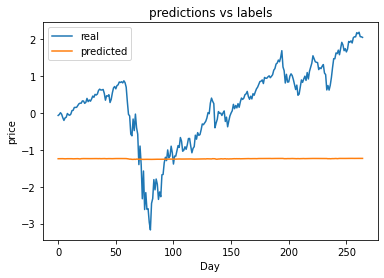

In [22]:
plt.title(f'predictions vs labels')
plt.xlabel('Day')
plt.ylabel('price')
plt.plot(real_labels, label='real')
plt.plot(predicted_labels, label='predicted')
plt.legend();

# plt.savefig('/content/drive/My Drive/Deep Learning Final Project/Linear_first_30_SP500-preds1.jpg')